# Polynomial Regression -  Overfitting Simulation

In [1]:
# This notebook has been created to better understand the topics of overfitting-underfitting

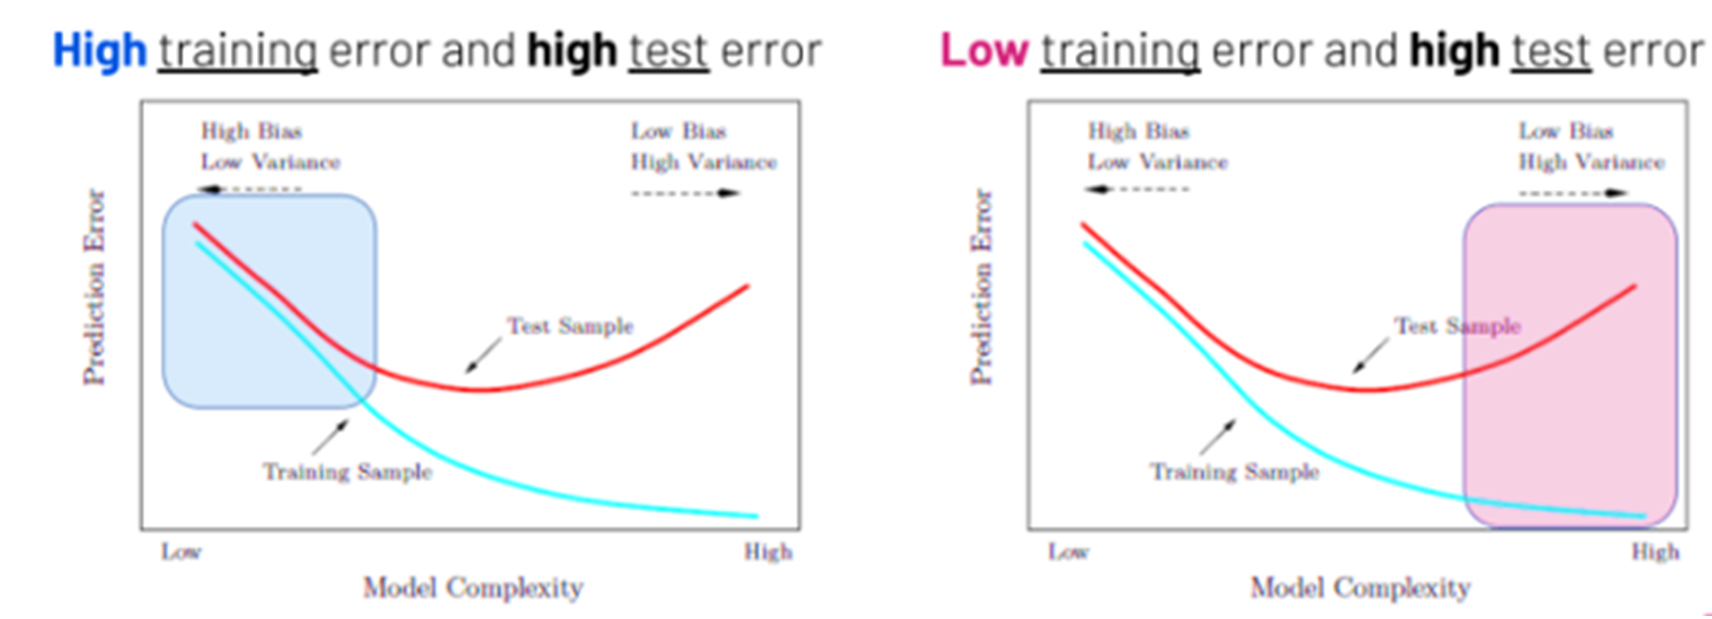

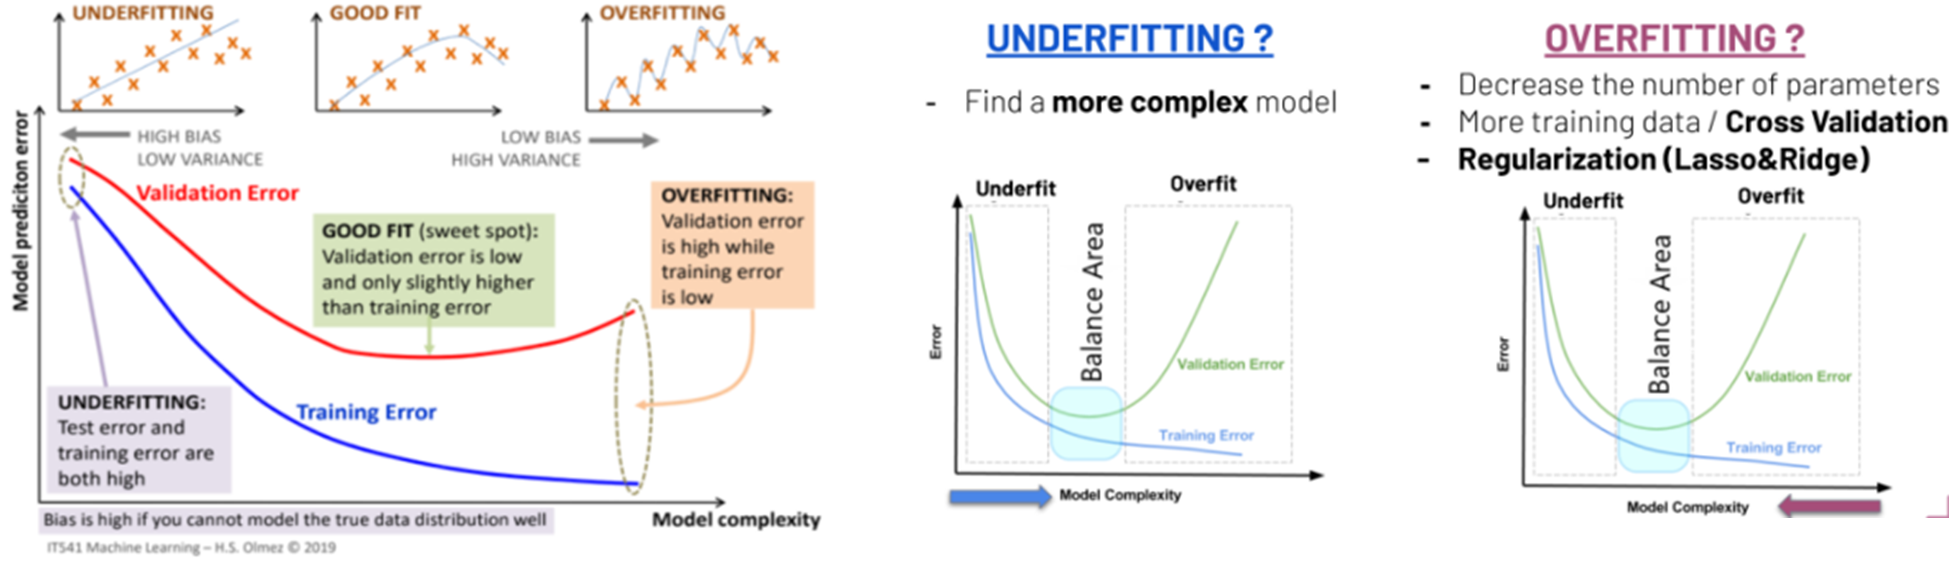

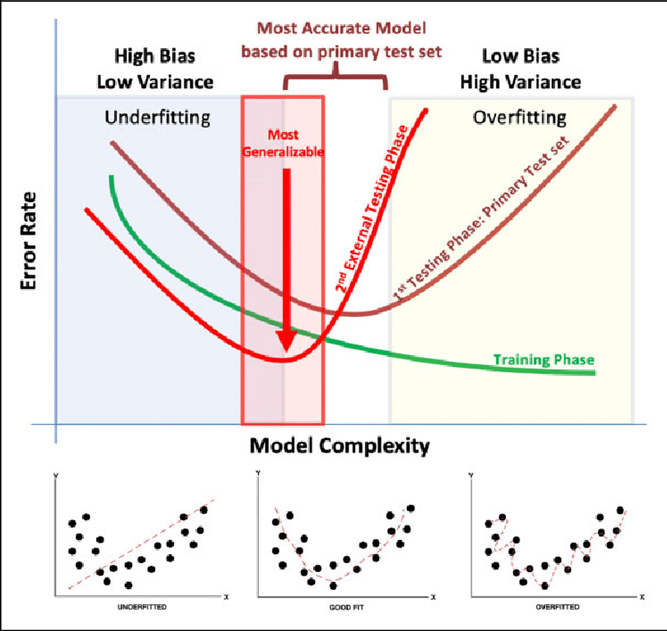

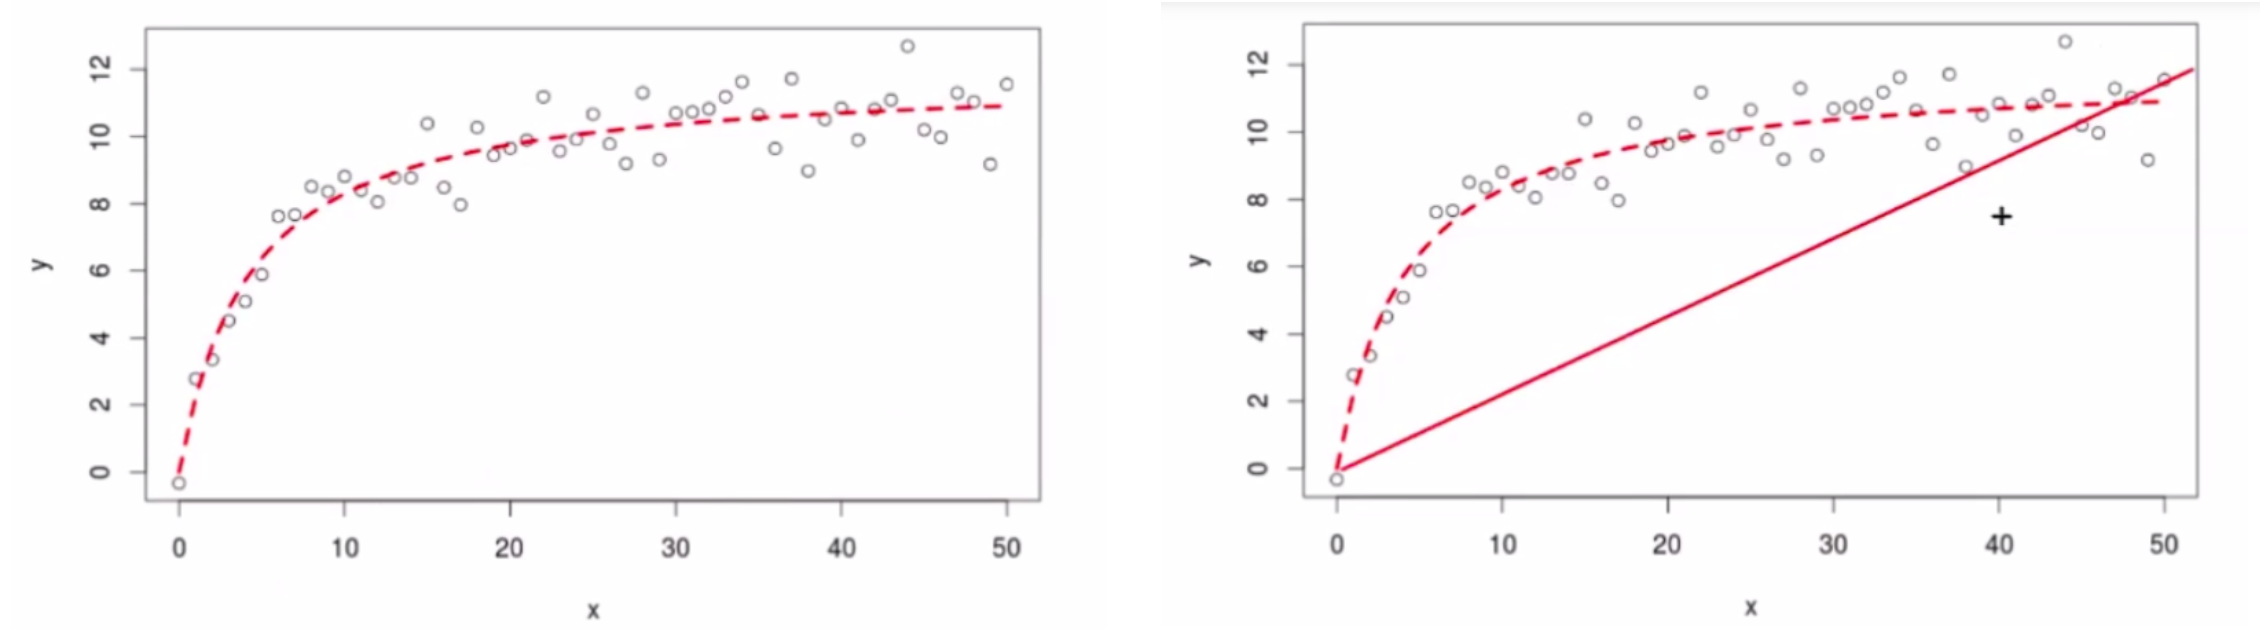

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# let's evaluate it simply on a sample data set
data = np.array([[2, 3, 4]])
print(data)

[[2 3 4]]


In [5]:
poly_model = PolynomialFeatures(degree=2, include_bias=False) #  created model 
# This is a tecnic of creating syntetic data

In [6]:
poly_model.fit(data)
# fit is for learning, for training

PolynomialFeatures(include_bias=False)

In a nutshell:
- For training data: `fit` followed by `transform` or directly `fit_transform`
- For test data: `transform` only

In [7]:
poly_model.transform(data)

# transform is for testinng 
# i applied the equation on the data 
# 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2. #  syntetic data 
# X1 ** 2 + X2 ** 2 + X3 ** 2 + X1X2 + X1X3 + X2X3 + X1 + X2 + X3 

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [8]:
# We can also use the following code to do both transform and fit at the same time
# the above two operations can be done in one method 

poly_model.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [9]:
# degree 3 increases both the number of features and the interpretation of the operation becomes difficult and complicated (19 values generated)
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

## Read Dataset

In [10]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


The numbers in the data set can be understood in thousands of units. The numbers in the “TV”, “Radio”, “Newspaper” and “Sales” columns in the “Advertising.csv” data set are expressed in thousands of units. That is, a value in these columns represents an amount that is actually a thousand times that value.

If a TV advertising spend is shown as 230.1, this means that 230,100 units (e.g. dollars, euros) were actually spent.
Similarly, if a sales value is shown as 22.1, it means that 22,100 units were actually sold.
This type of notation is often used to make large amounts of data more readable and manageable. Especially with financial data, it is important to express large numbers in a concise and understandable way.

We will increase the number of features by doing polynomial conversion. As a result of this process with degree= 2, we will have a total of 9 features. On this occasion, we will create artificial data with Feature engineering

## Polynomial Converter 

In [11]:
# Now let's use the Polynomial Features function to mathematically increase the number of features in our data set

In [12]:
X = df.drop("sales", axis = 1) # features
y = df.sales #  target

In [13]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [14]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [15]:
 # created polynomial features
poly_features = poly_conv.transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
 # number of rows remained 200, feature increased from 3 to 9
poly_features.shape

(200, 9)

In [17]:
pd.DataFrame(poly_features, columns=["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                    "TV&newspaper", "radio^2", "radio&newspaper", "newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&radio,TV&newspaper,radio^2,radio&newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [18]:
# remember the original form
X.shape

(200, 3)

## Train | Test Split

In [19]:
from sklearn.model_selection import train_test_split
# as we have created synthetic data using polynomial features function, it may have shortcomings so no high hopes

In [20]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
# We preferred the data set with 9 features by taking poly_features instead of X

## Model fitting

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_poly = LinearRegression()

In [23]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model_poly.predict(X_test)

In [25]:
compare = pd.DataFrame({"Actual":y_test, "Predicted":y_pred, "residual": y_test - y_pred})
compare

,Actual,Predicted,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


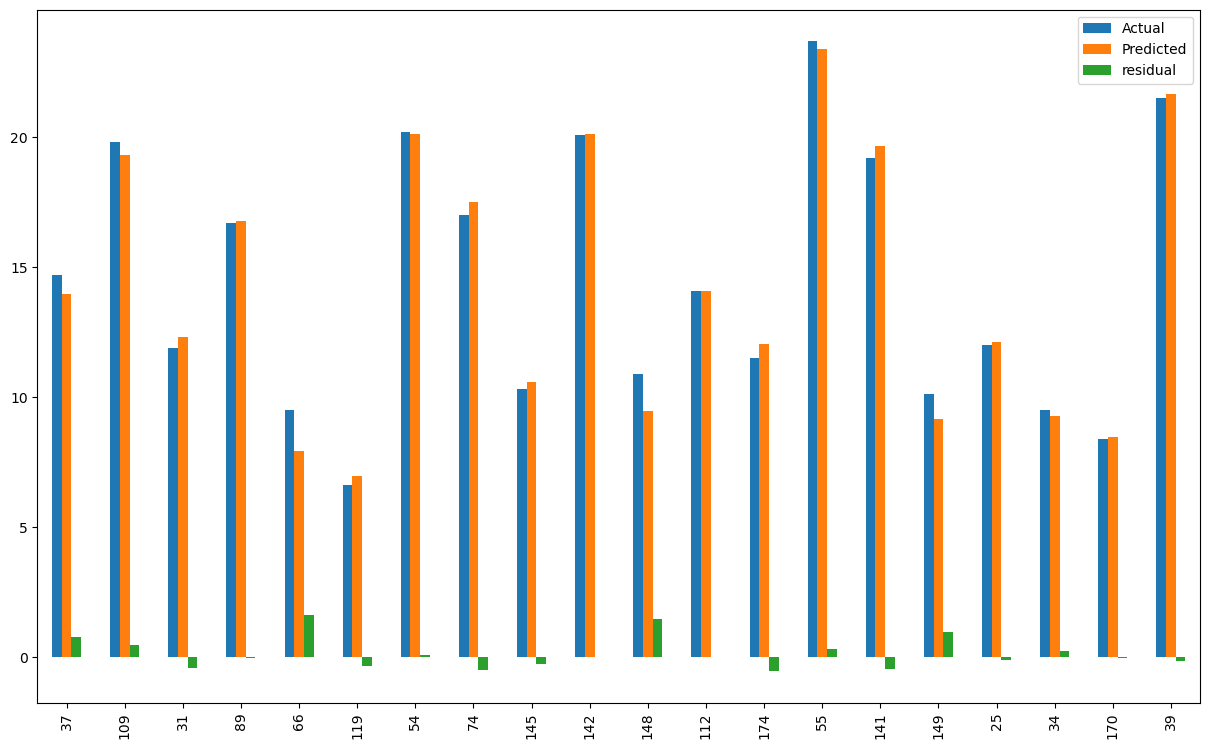

In [26]:
compare.head(20).plot(kind = "bar", figsize = (15, 9))
plt.show();
# the residuals are smaller than multiple linear regression models

## Polynomial Coefficients

In [27]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [28]:
# let's create a df of coefficients to compare them with previous features

df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                    "TV&newspaper", "radio^2", "radio&newspaper", "newspaper^2"], columns = ["coef"])

In [29]:
#coefficients tells me how much a 1 unit increase in feature will increase my prediction

In [30]:
# let's manually put the first line in the prediction line...the picture below shows the first line values
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

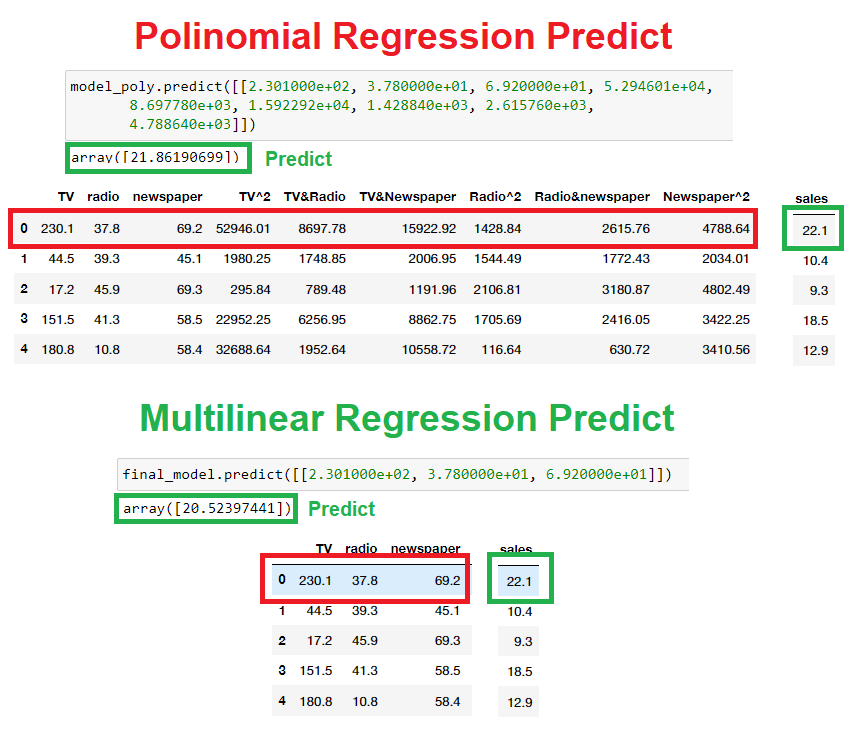

# Evaluation on the Test Set

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
y_pred = model_poly.predict(X_test)

In [33]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [34]:
# Test scores
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9843529333146789
MAE 		: 0.48967980448037096
MSE 		: 0.44175055104035904
RMSE 		: 0.6646431757269152


In [35]:
y_train_pred = model_poly.predict(X_train)

In [36]:
# Train scores
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.40492481391515467
MSE 		: 0.3456939142443998
RMSE 		: 0.5879574085292232


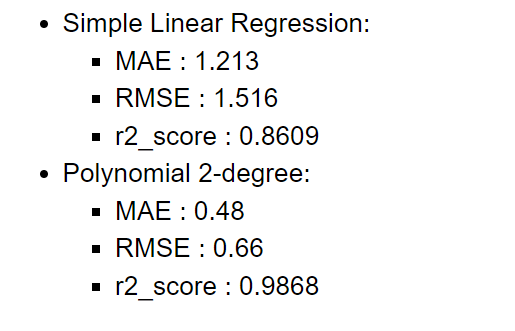

trying overfitting -- cannot directly decide based on the score above, must check the residual plot, must do cross validation, there's no feature or real data like tv^2, so it's just a synthetic or fake data created with mathematical manipulation just to increase the complexity and improve score.

# Find an Optimum Polynomial Degree

In [37]:
# will decide the optimum degree based on RMSE
# which degree is the ideal, the one that gives the highest score and least error

In [38]:
def poly(d):   # write the degree
    
    train_rmse_errors = []   # trains rmse 
    test_rmse_errors = []    # test rmse 
    number_of_features = []  # 
    
    for i in range(1, d):  # 1 
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [39]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,1.734594,1.516152,3
2,0.587957,0.664643,9
3,0.433934,0.580329,19
4,0.351708,0.507774,34
5,0.250934,2.575825,55
6,0.197125,4.492671,83
7,5.421422,1381.404069,119
8,0.142654,4449.568027,164
9,0.166753,95893.026583,219


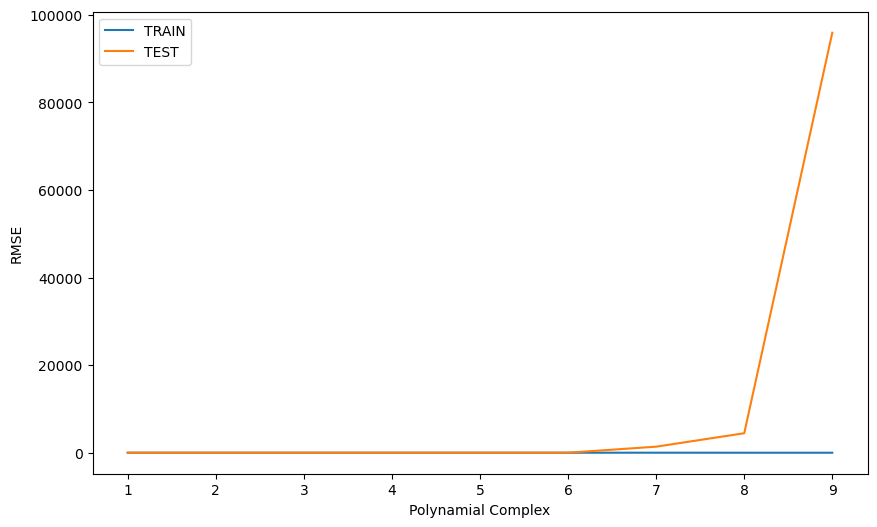

In [40]:
# Let's draw a graph of the above results and see the explosion point
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

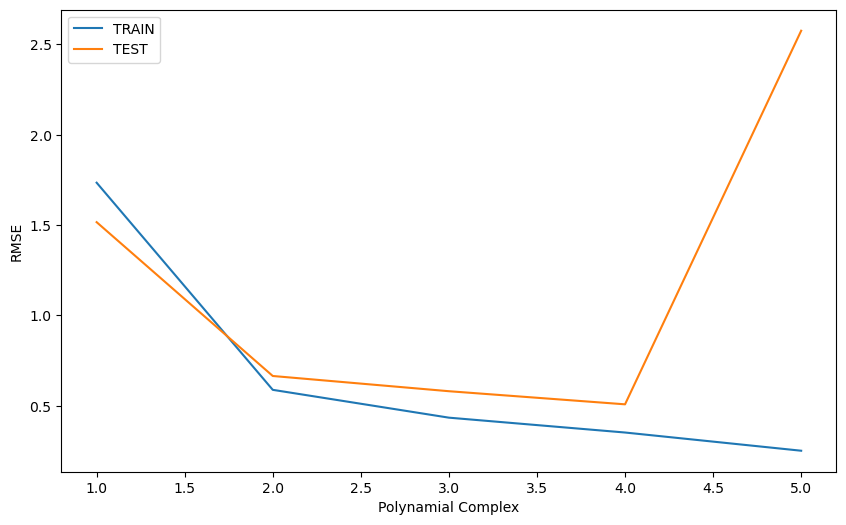

In [41]:
# let's look at the visual from a closer point

plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show();


In [42]:
# the selected degree must be before the explosion point.
# that's why it is ideal to select the 3rd degree
# the results of degree 2 and degree 3 is very close to eachother, almost as identical, so if the analysis
# or question at hand is not very serious; like cancer, we can avoid degree 3 and go for degree 2 just to
# have less features.

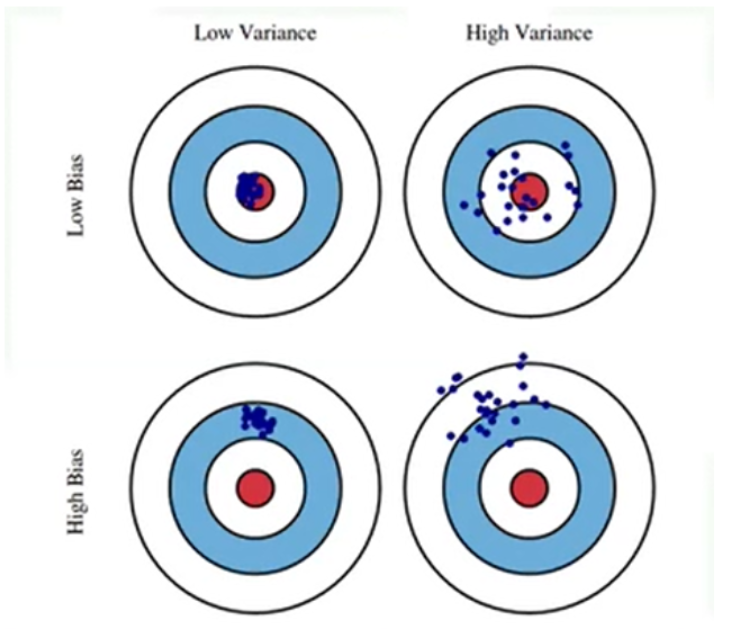

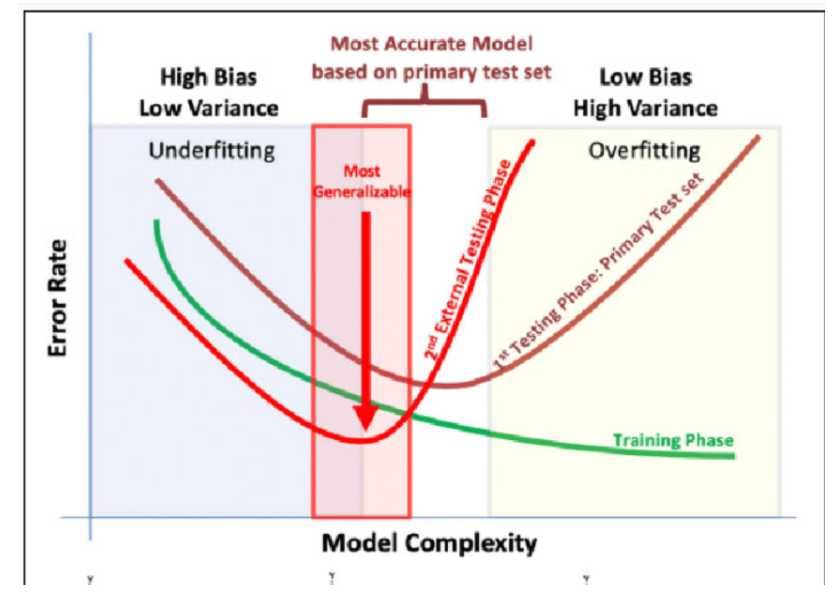

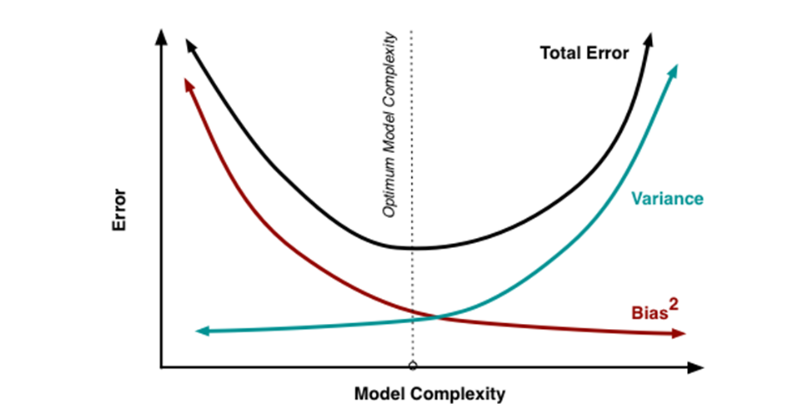

## Finalizing Model Choice

I will decide that my model is 3rd degree on this notebook and I will make my final model accordingly.

I want to train my model with maximum data (for a better training) and I give all my data into the model fit

In [43]:
# Let's continue by accepting that the optimum degree is degree 3, let's build the final model with this information
# we want to get better results by training the model with all the data. Train-test part no longer exists
final_poly_conv = PolynomialFeatures(degree = 3, include_bias = False)

# We'll train our model with the 3rd degree...

In [44]:
final_model = LinearRegression()

In [45]:
# I fit my model, I use Polymomial Feature instead of X and generate feature for 3rd order.
# I take the final_poly_conv variable and fit all the data with (X)
final_model.fit(final_poly_conv.fit_transform(X), y)

LinearRegression()

## Prediction

In [46]:
 # while making prediction, we give as many features as the initial number of features
new_record = [[150, 20, 15]]

In [47]:
# converted to polynomial feature
new_record_poly = final_poly_conv.fit_transform(new_record)


In [48]:
new_record_poly

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [49]:
 # we predicted the new state with final_model information
final_model.predict(new_record_poly)

array([14.24950844])

# Overfitting 

In [50]:
# Let's generate a feature based on the 5th degree, which is the point where overfitting starts in the graph above (where train and test diverge)
# Let's watch the occurrence of overfitting

In [51]:
over_poly_converter = PolynomialFeatures(degree=5, include_bias=False)
# We generate a 5th order polynomial features

In [52]:
over_model = LinearRegression()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [54]:
over_model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred_over = over_model.predict(X_test)

In [56]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.7649888518703625
MAE 		: 0.6659574891491746
MSE 		: 6.634873249711867
RMSE 		: 2.5758247707699113


In [57]:
# train scores
y_train_pred_over = over_model.predict(X_train)

In [58]:
eval_metric(y_train, y_train_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.9976072484653282
MAE 		: 0.18621400407821548
MSE 		: 0.06296802050706767
RMSE 		: 0.2509342951990972


In [ ]:
# There is a significant difference between the train R2 of 0.99 and the test R2 of 0.76. This difference showed us overfitting
# overfitting was diagnosed because the train set had very good scores but the test set had bad scores